# **1. Analyse the data using the visualizations**

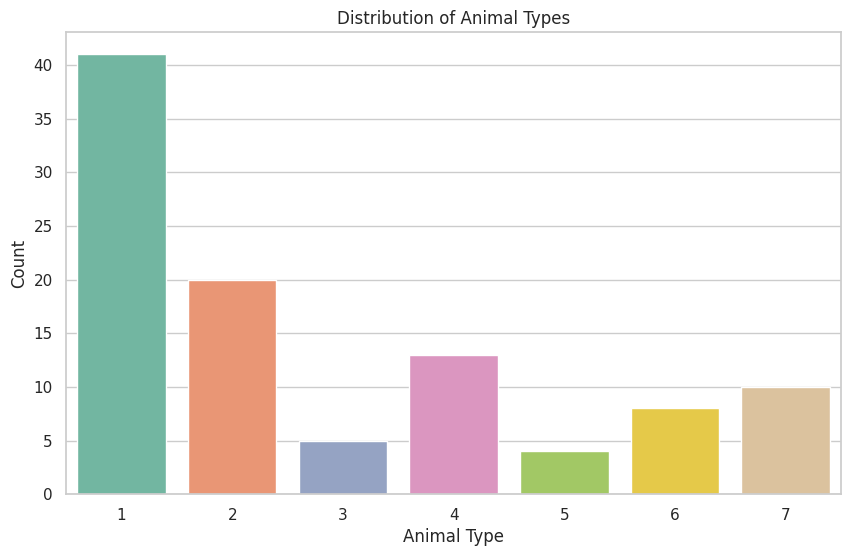

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
zoo_data = pd.read_csv('/content/Zoo.csv')

# Set up the plotting style
sns.set(style="whitegrid")

# Plot 1: Distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=zoo_data, palette='Set2')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

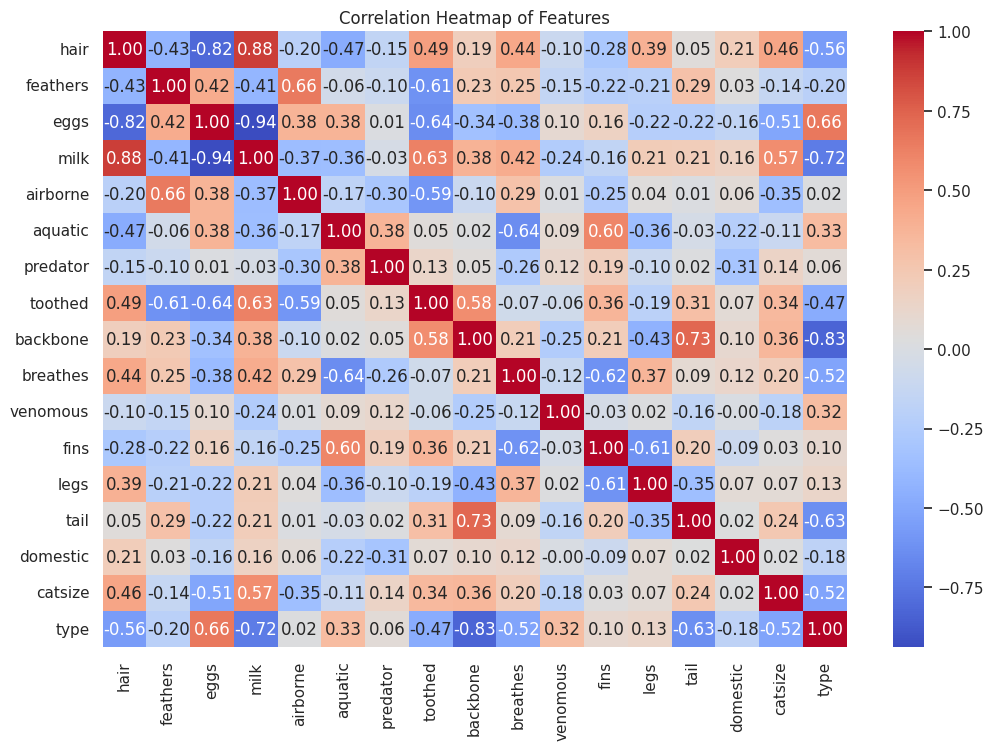

In [15]:
# Plot 2: Correlation heatmap
plt.figure(figsize=(12, 8))
corr = zoo_data.drop(columns=['animal name']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

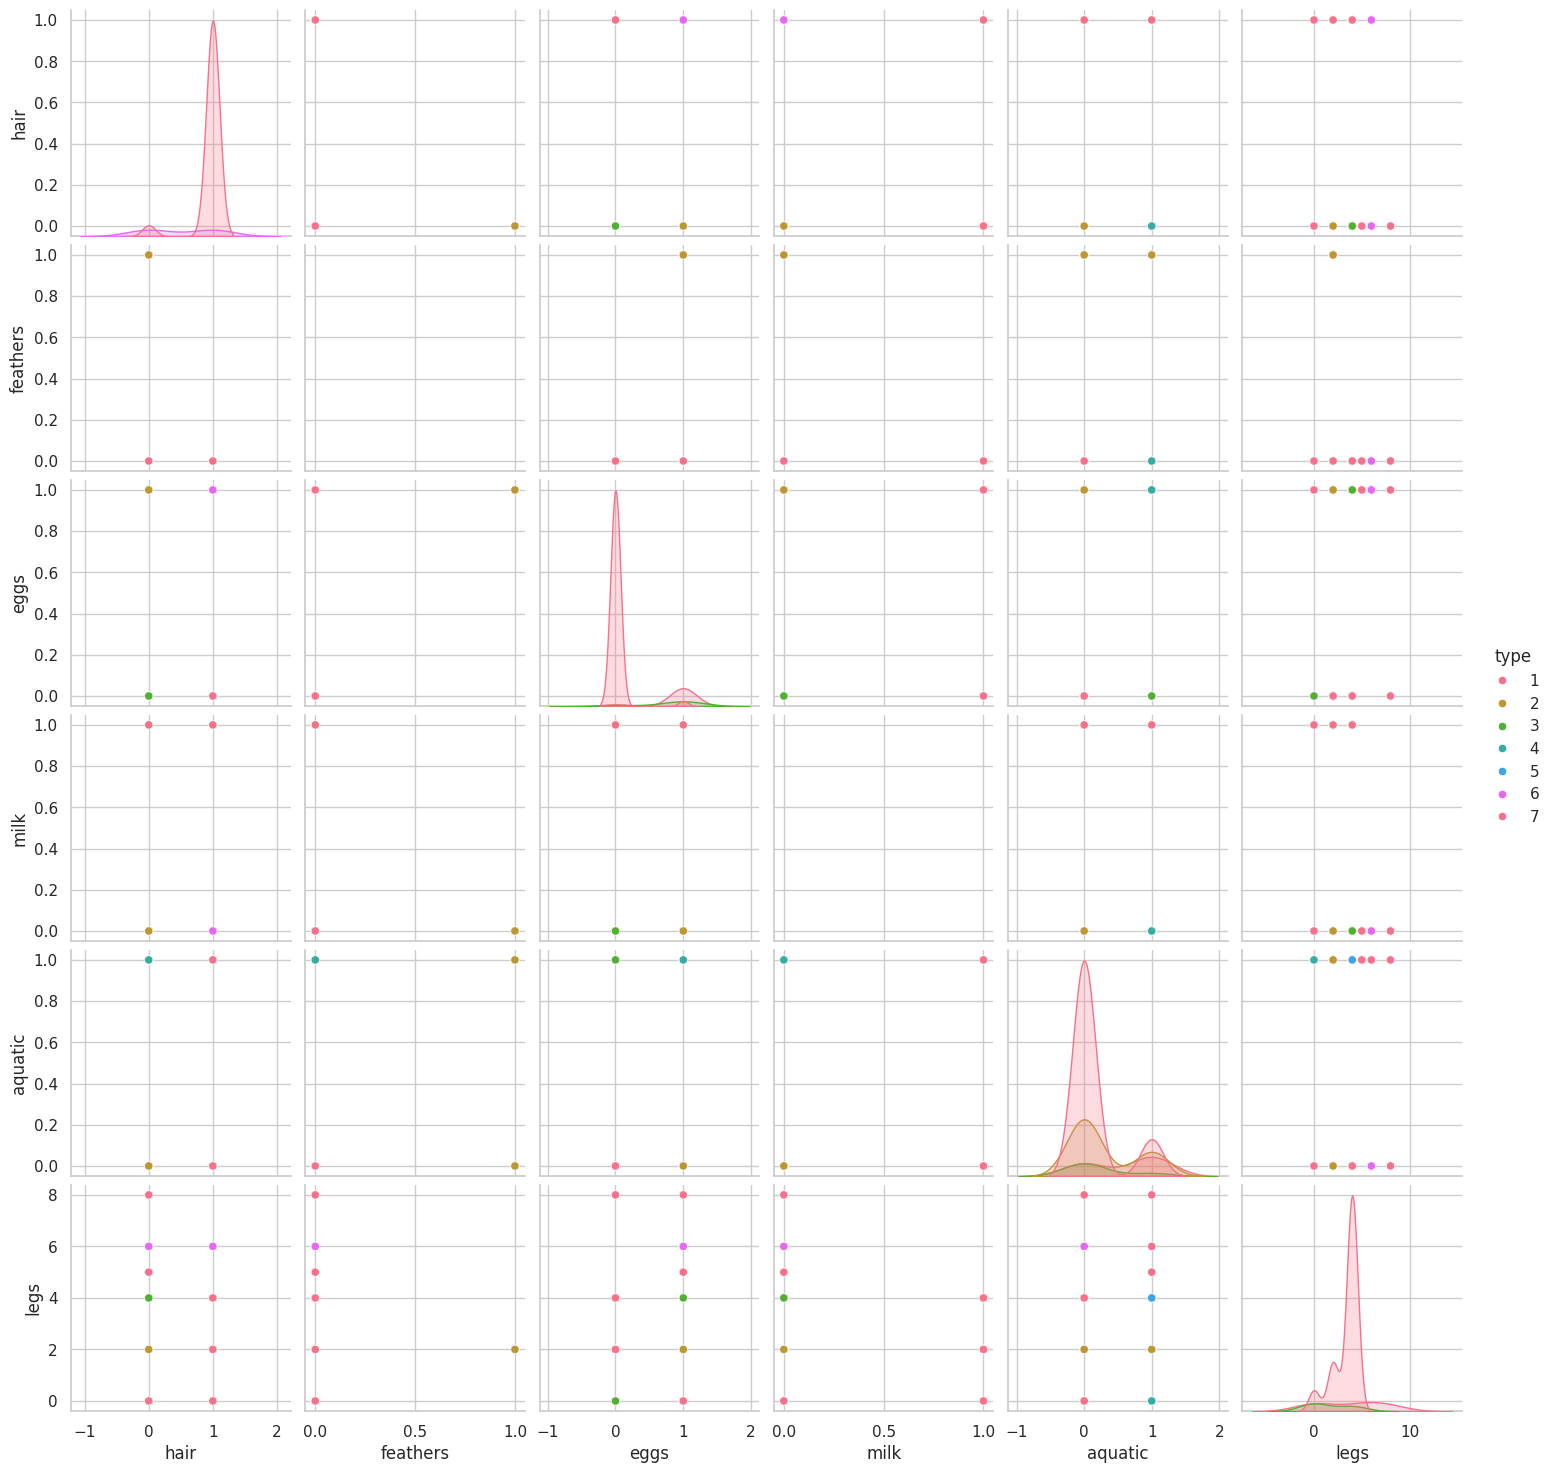

In [16]:
# Plot 3: Pair plot for selected features
selected_features = ['hair', 'feathers', 'eggs', 'milk', 'aquatic', 'legs', 'type']
sns.pairplot(zoo_data[selected_features], hue='type', palette='husl')
plt.show()

# **2. Preprocess the data by handling missing values & Outliers, if any.**

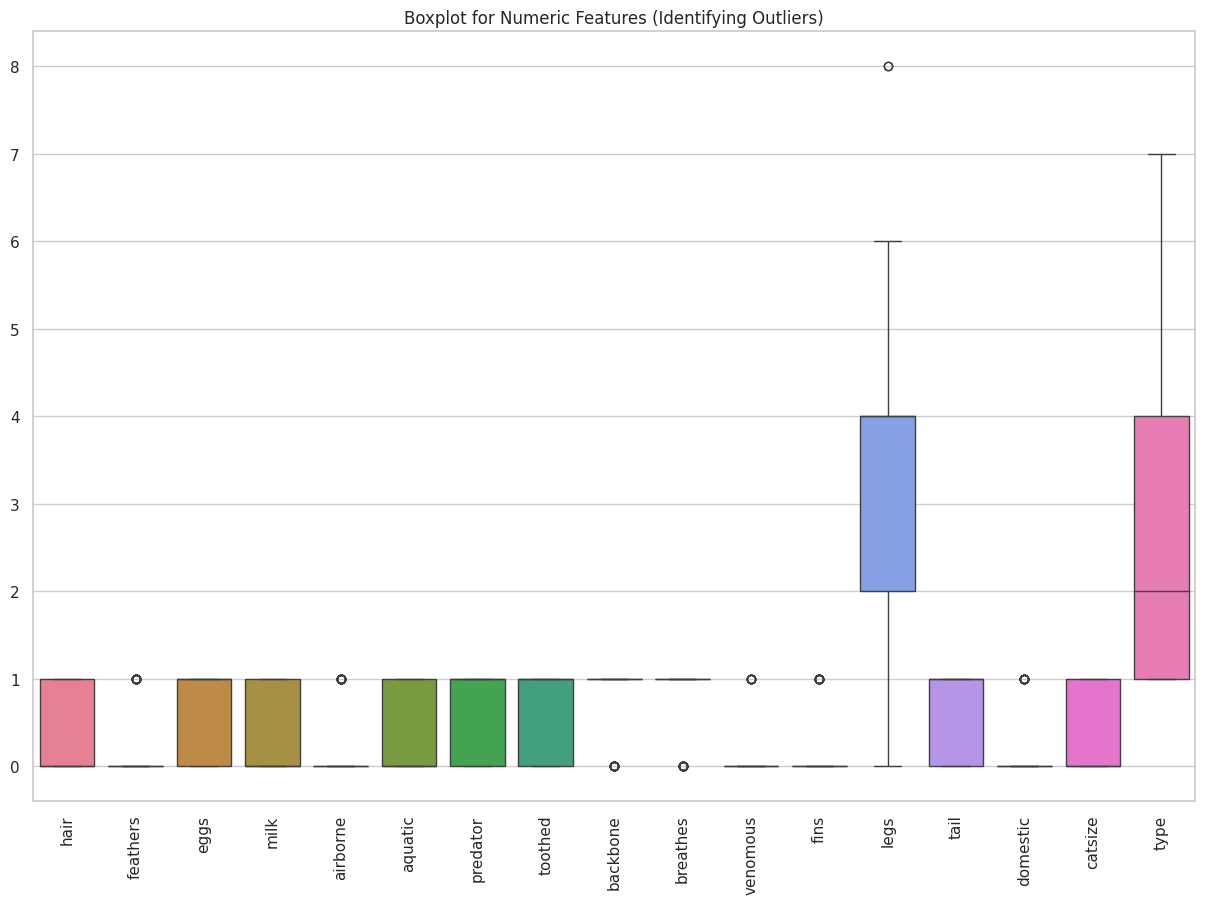

(  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
 0    aardvark     1         0     0     1         0        0         1   
 1    antelope     1         0     0     1         0        0         0   
 2        bass     0         0     1     0         0        1         1   
 3        bear     1         0     0     1         0        0         1   
 4        boar     1         0     0     1         0        0         1   
 
    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
 0        1         1         1         0     0     4     0         0        1   
 1        1         1         1         0     0     4     1         0        1   
 2        1         1         0         0     1     0     1         0        0   
 3        1         1         1         0     0     4     0         0        1   
 4        1         1         1         0     0     4     1         0        1   
 
    type  
 0     1  
 1     1  
 2     4  
 3     1  

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Handling Missing Values
# Check for missing values
missing_values = zoo_data.isnull().sum()

# If missing values are found, decide how to handle them (e.g., drop or fill)
# Here, I'll drop rows with missing values (if any)
zoo_data_cleaned = zoo_data.dropna()

# Step 2: Handling Outliers

# Boxplots for identifying outliers in the numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=zoo_data_cleaned.drop(columns=['animal name']))
plt.title('Boxplot for Numeric Features (Identifying Outliers)')
plt.xticks(rotation=90)
plt.show()

# To handle outliers, we can cap them to a specific percentile, e.g., 1st and 99th percentile.
# Define a function to cap outliers
def cap_outliers(df, column):
    lower_limit = df[column].quantile(0.01)
    upper_limit = df[column].quantile(0.99)
    df[column] = df[column].clip(lower_limit, upper_limit)

# Apply outlier capping to numeric columns (except 'animal name')
numeric_columns = zoo_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    cap_outliers(zoo_data_cleaned, col)

# Check the cleaned dataset
zoo_data_cleaned.head(), zoo_data_cleaned.describe()

# **3. Split the dataset into training and testing sets (80% training, 20% testing).**

In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'type' is the target variable, and we want to split based on that
X = zoo_data_cleaned.drop(columns=['type', 'animal name'])  # Features (drop target and non-numeric 'animal name')
y = zoo_data_cleaned['type']  # Target

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

# **4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Step 1: Initialize the KNN classifier
# Set n_neighbors to 5 (you can adjust this hyperparameter as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the KNN model on the training data
knn.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = knn.predict(X_test)

# Step 4: Evaluate the model's performance
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the evaluation results
accuracy, classification_rep, conf_matrix

(0.9047619047619048,
 '              precision    recall  f1-score   support\n\n           1       1.00      0.92      0.96        12\n           2       1.00      1.00      1.00         2\n           3       0.00      0.00      0.00         1\n           4       0.50      1.00      0.67         2\n           6       1.00      1.00      1.00         3\n           7       1.00      1.00      1.00         1\n\n    accuracy                           0.90        21\n   macro avg       0.75      0.82      0.77        21\nweighted avg       0.90      0.90      0.90        21\n',
 array([[11,  0,  0,  1,  0,  0],
        [ 0,  2,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0],
        [ 0,  0,  0,  2,  0,  0],
        [ 0,  0,  0,  0,  3,  0],
        [ 0,  0,  0,  0,  0,  1]]))

# **5. Choose an appropriate distance metric and value for K.**

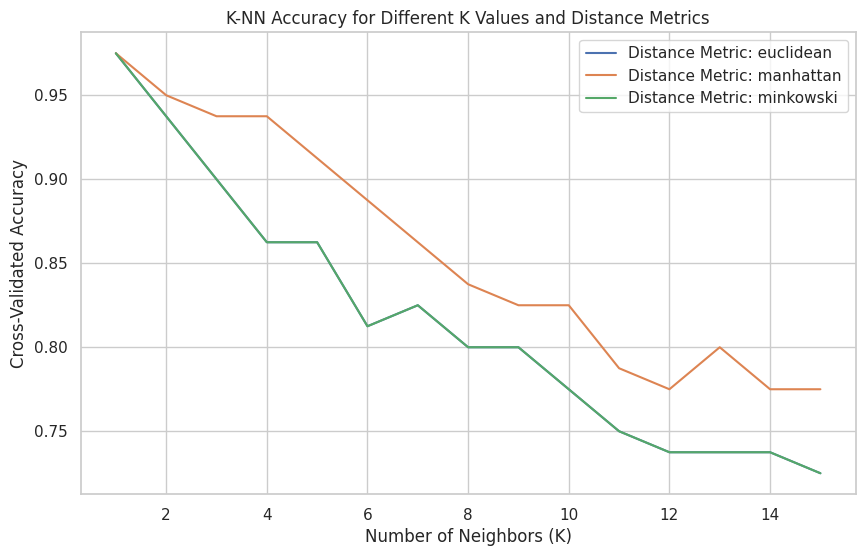

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Different values of K to test
k_values = range(1, 16)  # Test K values from 1 to 15
# Different distance metrics to test
metrics = ['euclidean', 'manhattan', 'minkowski']

# Dictionary to store cross-validation results
cv_results = {}

# Loop through each metric and K value
for metric in metrics:
    cv_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        # Perform 5-fold cross-validation
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())  # Store the average score across 5 folds
    cv_results[metric] = cv_scores

# Output the cross-validation results for each metric
cv_results

# Plotting the results for visual comparison
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(k_values, cv_results[metric], label=f'Distance Metric: {metric}')

plt.title('K-NN Accuracy for Different K Values and Distance Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()

**6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.**

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the following variables:
# y_test - the true labels for the testing set
# y_pred - the predicted labels from your classifier

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


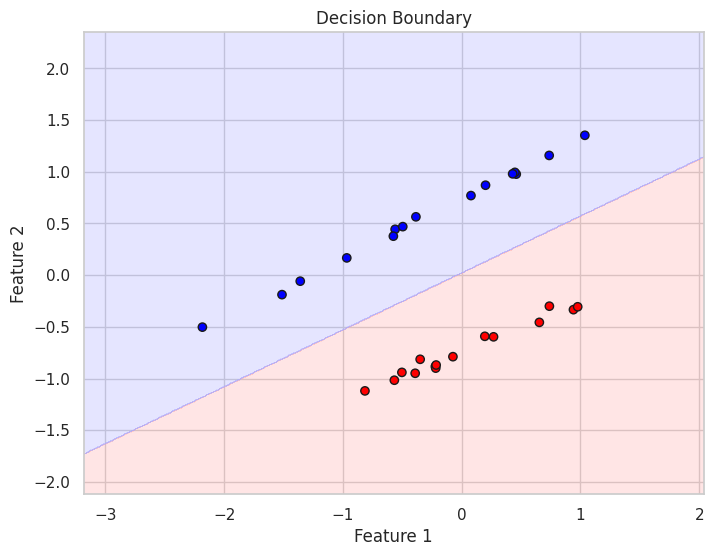

In [22]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate a toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Define the decision boundary plotting function
def plot_decision_boundary(clf, X, y, title='Decision Boundary'):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(clf, X_test, y_test)

# **Interview Questions:**
1. What are the key hyperparameters in KNN?
In K-Nearest Neighbors (KNN), the key hyperparameters are:

Number of Neighbors (k): Determines how many neighbors to consider when making a prediction. A smaller k can lead to a model that is more sensitive to noise, while a larger k makes the model more stable but potentially less sensitive to small patterns.

Distance Metric: Defines how the distance between data points is calculated. Common metrics include Euclidean, Manhattan, and Minkowski. The choice of metric can affect the performance and accuracy of the model.

Weights: Determines how the influence of neighbors is weighted. Options typically include uniform (all neighbors have equal weight) or distance-based (closer neighbors have more influence).

These hyperparameters significantly impact the performance and behavior of the KNN algorithm.

2. What distance metrics can be used in KNN?

In K-Nearest Neighbors (KNN), you can use various distance metrics to measure the similarity between data points. Common distance metrics include:

Euclidean Distance: The straight-line distance between two points.
Manhattan Distance: The sum of the absolute differences of their coordinates.
Minkowski Distance: A generalization of Euclidean and Manhattan distances.
Chebyshev Distance: The maximum absolute difference along any coordinate dimension.
Cosine Similarity: Measures the cosine of the angle between two vectors (though not a true distance metric, it’s often used in text classification).